## Importo las librerias necesarias

In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, lfilter
from scipy.signal import kaiserord, firwin, freqz
from scipy import signal
%matplotlib notebook

## Señales

In [2]:
duracion = 5 # segundos
fs = 32000   # Frecuencia de muestreo
n = np.arange(fs*duracion)

# Señal A
amplitud_A = 1
f_A = 1000
signal_A = (amplitud_A * np.sin(2*np.pi*(f_A/fs)*n)).astype(np.float32)
             
# Señal B
amplitud_B = 1
f_B = 1500
signal_B = (amplitud_B * np.sin(2*np.pi*(f_B/fs)*n)).astype(np.float32)
             
# Señal C
amplitud_C = 1
f_C = 3000
signal_C = (amplitud_C * np.sin(2*np.pi*(f_C/fs)*n)).astype(np.float32)



## Sumo las tres señales

In [3]:
signal_out = signal_A + signal_B + signal_C

## Grafico en funcion del tiempo

<IPython.core.display.Javascript object>


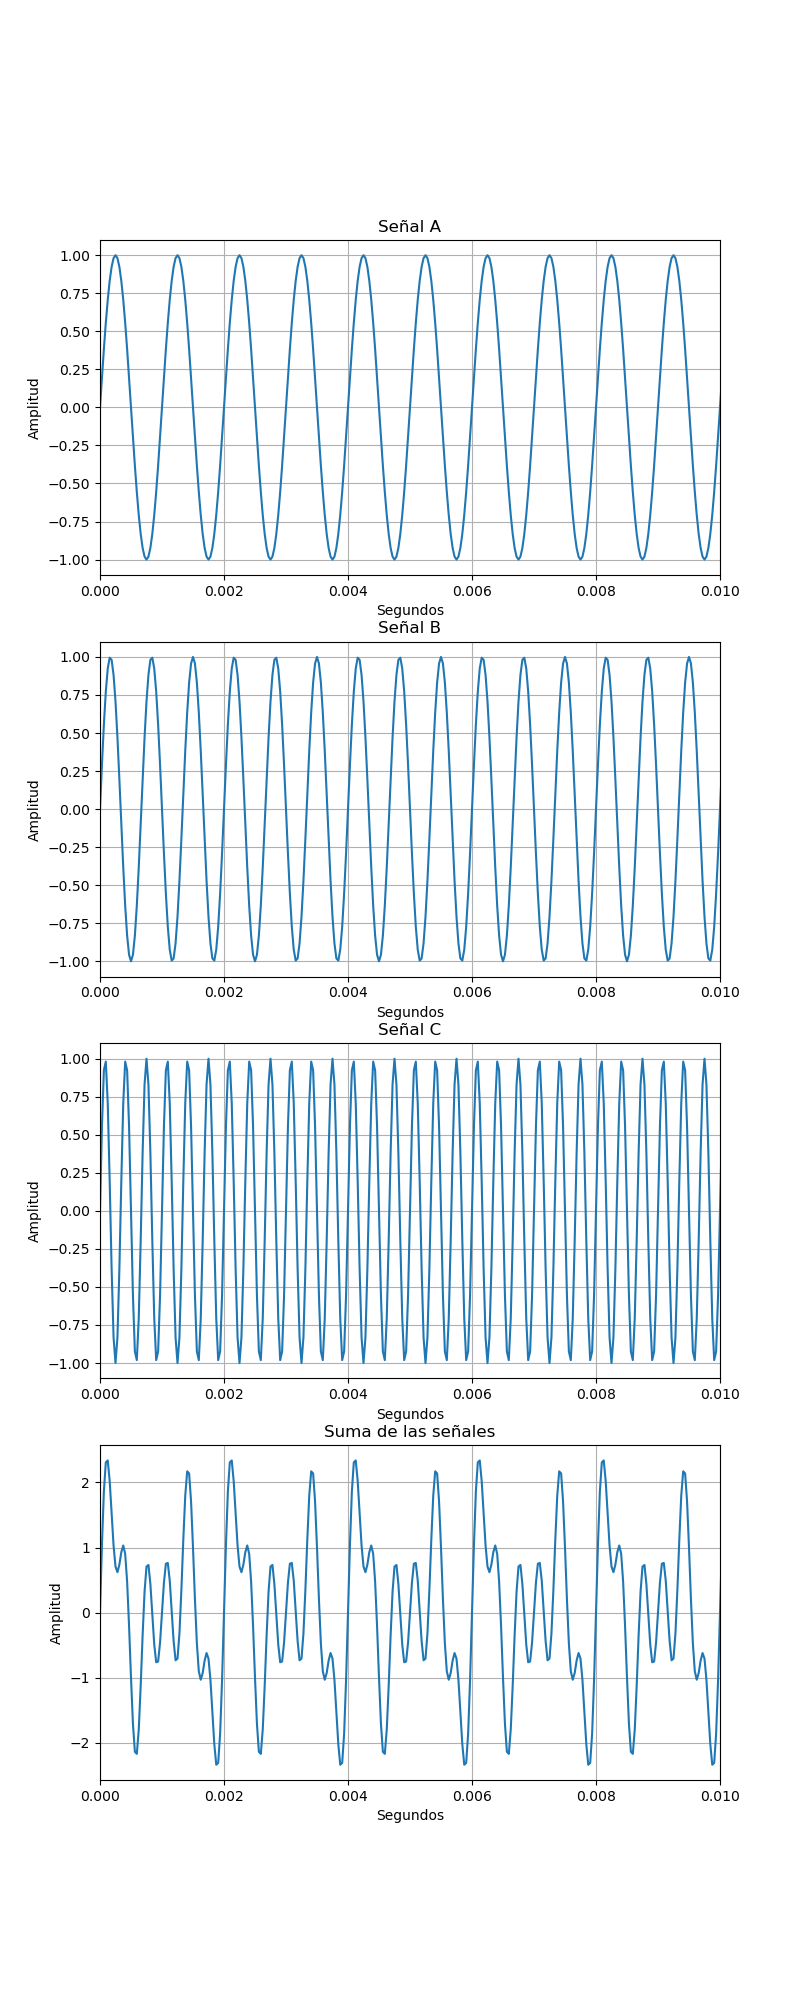

In [4]:
plt.figure(figsize=(8,20))
plt.subplot(411)
plt.plot(n/fs, signal_A)
plt.title("Señal A")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(412)
plt.plot(n/fs, signal_B)
plt.title("Señal B")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(413)
plt.plot(n/fs, signal_C)
plt.title("Señal C")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(414)
plt.plot(n/fs, signal_out)
plt.title("Suma de las señales")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.show()


## Grafico en frecuencia

<IPython.core.display.Javascript object>


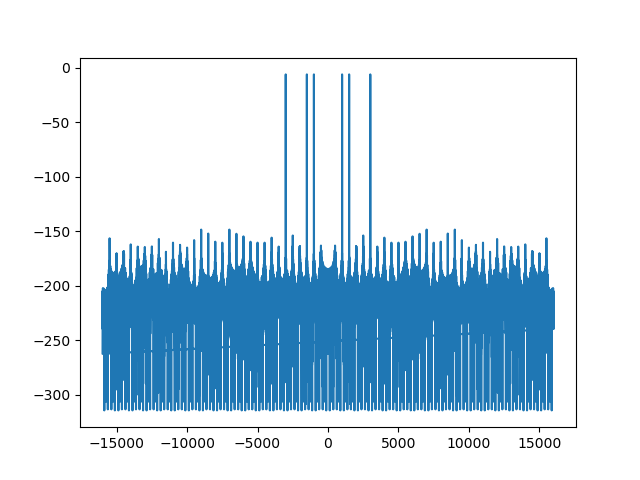

In [5]:
plt.figure()
N = signal_out.shape[0]
Y = fft(signal_out)/N
frq = fftfreq(N, 1/fs)
plt.plot(frq, 20*np.log10(abs(Y)))
plt.show()

## Placa de sonido

In [6]:
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs,  output=True)

stream.write(signal_out)

stream.stop_stream()
stream.close()

p.terminate()

## Filtro pasa banda, entre 2800Hz y 3200Hz

In [7]:
nyq = fs/2
low = 2800 / nyq
high = 3200 / nyq
transition_width = 250/ nyq
atenuacion = 70
numtaps, beta = kaiserord(atenuacion, transition_width)

print(numtaps)
print(beta)

555
6.75526


In [8]:
taps = signal.firwin(numtaps, [low, high], width=transition_width, window=('kaiser', beta), pass_zero=False)

In [9]:
signal_out_filter = lfilter(taps, 1.0, signal_out)

## Grafico en funcion del tiempo

<IPython.core.display.Javascript object>


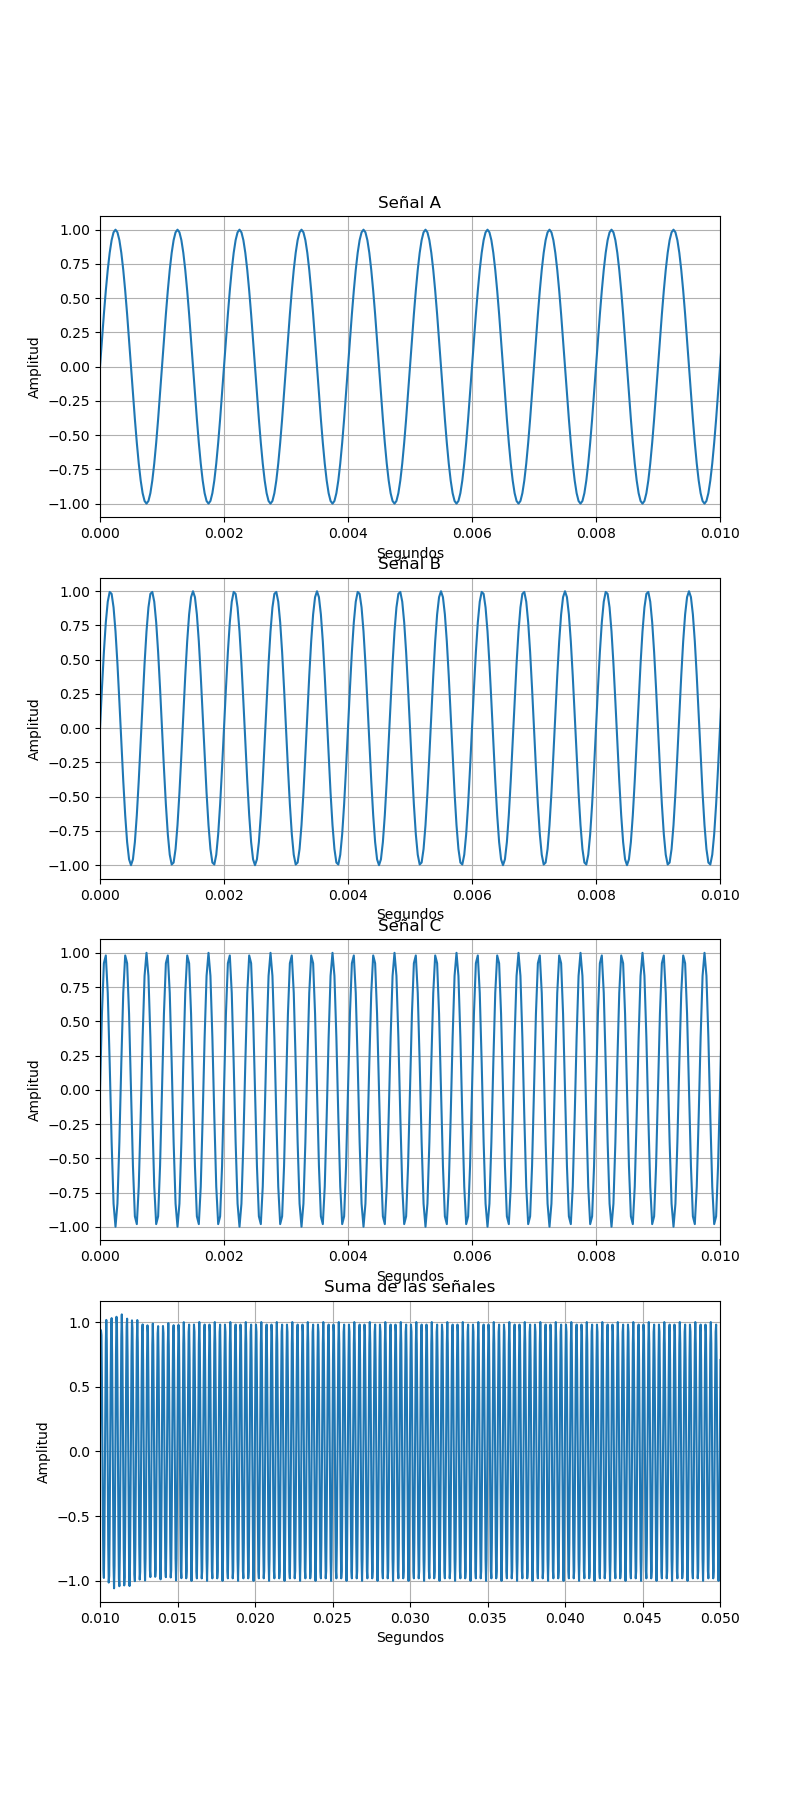

In [10]:
plt.figure(figsize=(8,18))
plt.subplot(411)
plt.plot(n/fs, signal_A)
plt.title("Señal A")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(412)
plt.plot(n/fs, signal_B)
plt.title("Señal B")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(413)
plt.plot(n/fs, signal_C)
plt.title("Señal C")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0,0.01)
plt.subplot(414)
plt.plot(n/fs, signal_out_filter)
plt.title("Suma de las señales")
plt.xlabel("Segundos")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(0.01,0.05)
plt.show()


## Grafico en frecuencia

<IPython.core.display.Javascript object>


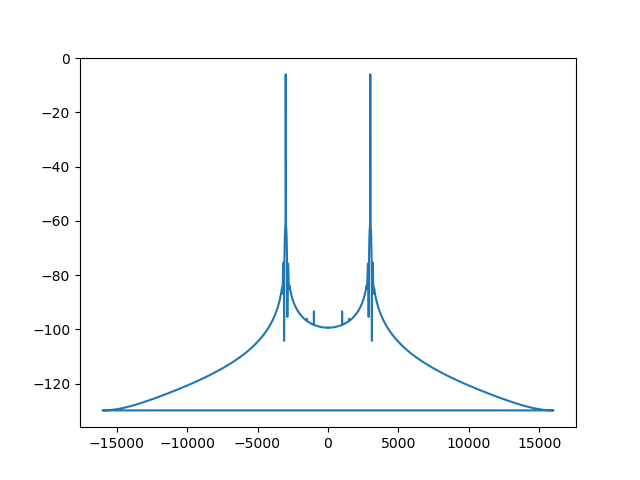

In [11]:
plt.figure()
n_2 = signal_out_filter.shape[0]
Y = fft(signal_out_filter)/n_2 # Normalizada
frq = fftfreq(n_2, 1/fs) # Recuperamos las frecuencias
plt.plot(frq, 20*np.log10(abs(Y))) # Representamos la parte imaginaria
plt.show()

## Placa de sonido

In [12]:
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs,  output=True)

stream.write(signal_out_filter)

stream.stop_stream()
stream.close()

p.terminate()